In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Loading and Understanding the Dataset**

In [ ]:
import pandas as pd

# load dataset
data = pd.read_csv('/content/gdrive/MyDrive/Dataset/Plant_1_Generation_Data.csv')

# Display the first few rows of the dataset
print(data.head())


          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  


**Data Preprocessing for Time Series Analysis**

In [ ]:
# Convert DATE_TIME to datetime and check for missing values
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])
missing_values = data.isnull().sum()

# Print the missing values in each column
print(missing_values)


DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64


**Exploratory Data Analysis and Visualization**

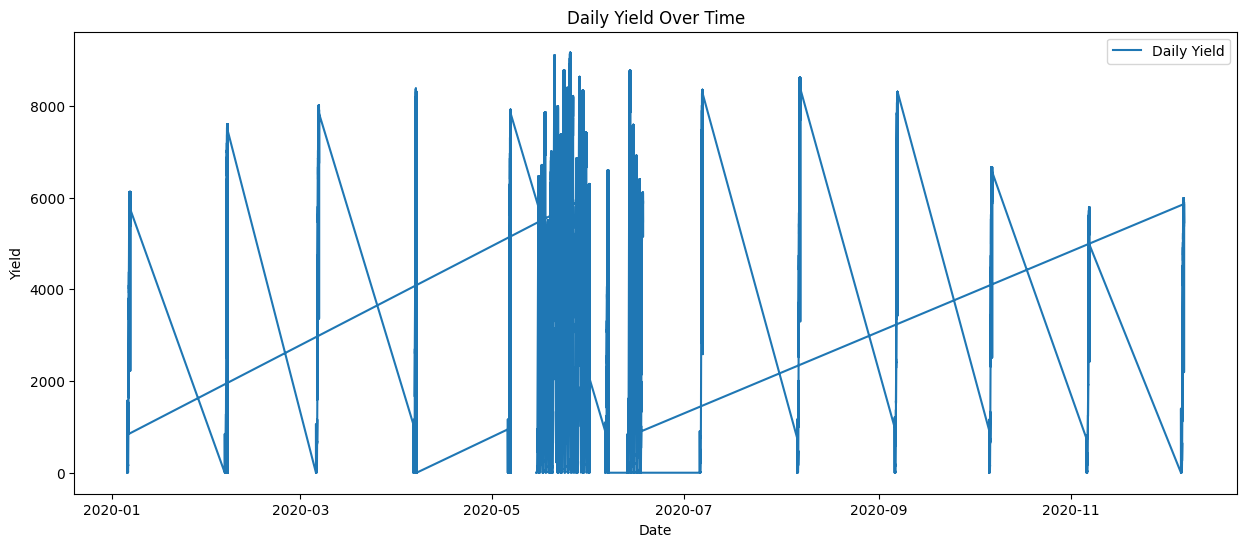

In [ ]:
import matplotlib.pyplot as plt

# Plotting daily yield over time
plt.figure(figsize=(15, 6))
plt.plot(data['DATE_TIME'], data['DAILY_YIELD'], label='Daily Yield')
plt.title('Daily Yield Over Time')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.legend()
plt.show()


**Feature Extraction from Time Series Data**

In [ ]:
data['hour'] = data['DATE_TIME'].dt.hour
data['day_of_week'] = data['DATE_TIME'].dt.dayofweek


**Using Pre-trained Models for Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'hour', 'day_of_week']])

# K-Means clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
kmeans.fit(scaled_features)
labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Evaluating and Visualizing the Clustering Results**

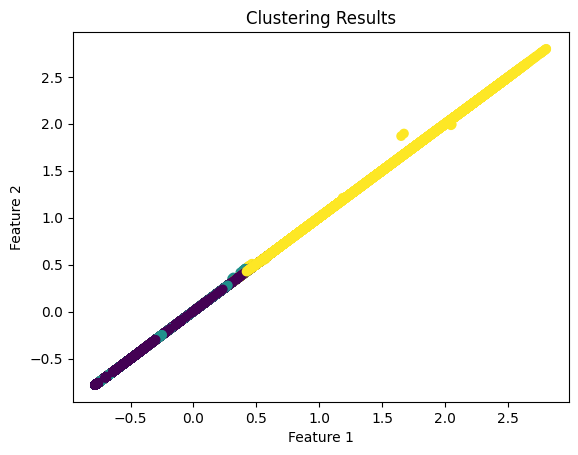

In [ ]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels)  # Adjust indices for different feature comparisons
plt.title('Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
